In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
df = pd.read_csv('StudentPerformance.csv')
df.head()

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
0,0.95822,3.4,8.2,53.0,47.0
1,0.85566,3.2,5.9,55.0,35.0
2,0.68025,3.2,9.3,41.0,32.0
3,0.25936,3.2,8.2,47.0,34.0
4,0.60447,3.8,10.0,75.0,33.0


In [66]:
def convert_to_grade(value):
    if value >= 90:
        return 'A'
    elif value >= 80:
        return 'B'
    elif value >= 70:
        return 'C'
    elif value >= 60:
        return 'D'
    elif value >= 40:
        return 'E'
    elif value >= 30:
        return 'F'
    else:
        return 'Fail'

def add_grade_column(df, grade_column, new_column_name='Grade_char'):
    df[new_column_name] = df[grade_column].apply(convert_to_grade)
    return df

df = add_grade_column(df, 'Grades')
df.head()

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades,Grade_char
0,0.95822,3.4,8.2,53.0,47.0,E
1,0.85566,3.2,5.9,55.0,35.0,F
2,0.68025,3.2,9.3,41.0,32.0,F
3,0.25936,3.2,8.2,47.0,34.0,F
4,0.60447,3.8,10.0,75.0,33.0,F


In [64]:
df['Grades'].agg(['min','max'])

min    32.0
max    91.0
Name: Grades, dtype: float64

In [5]:
df.shape

(1000, 8)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1388 entries, 0 to 1387
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Socioeconomic Score  1388 non-null   float64
 1   Study Hours          1388 non-null   float64
 2   Sleep Hours          1388 non-null   float64
 3   Attendance (%)       1388 non-null   float64
 4   Grades               1388 non-null   float64
dtypes: float64(5)
memory usage: 54.3 KB


In [8]:
df.isna().sum()

Socioeconomic Score    0
Study Hours            0
Sleep Hours            0
Attendance (%)         0
Grades                 0
dtype: int64

In [67]:
from sklearn.model_selection import train_test_split
x = df[['Socioeconomic Score', 'Study Hours', 'Sleep Hours', 'Attendance (%)']]
y = df['Grade_char']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)


In [93]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=9,n_jobs=-1,random_state=40)
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=9, n_jobs=-1, random_state=40)

In [89]:
model.score(x_train,y_train)

1.0

In [94]:
model.score(x_test,y_test)

0.960431654676259

In [71]:
importance_df = pd.DataFrame({
    'Feature':x_train.columns, 
    'Importance':model.feature_importances_
}).sort_values('Importance', ascending=False)
importance_df

,Feature,Importance
1,Study Hours,0.624720
0,Socioeconomic Score,0.282522
3,Attendance (%),0.050172
2,Sleep Hours,0.042586


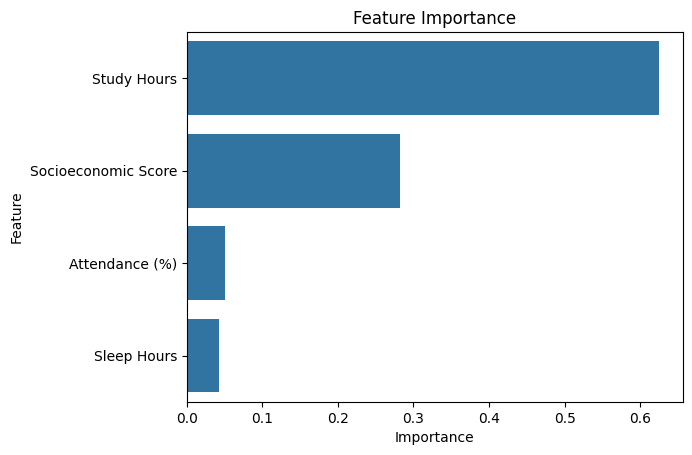

In [72]:
plt.title('Feature Importance')
sns.barplot(data=importance_df, x='Importance', y='Feature');

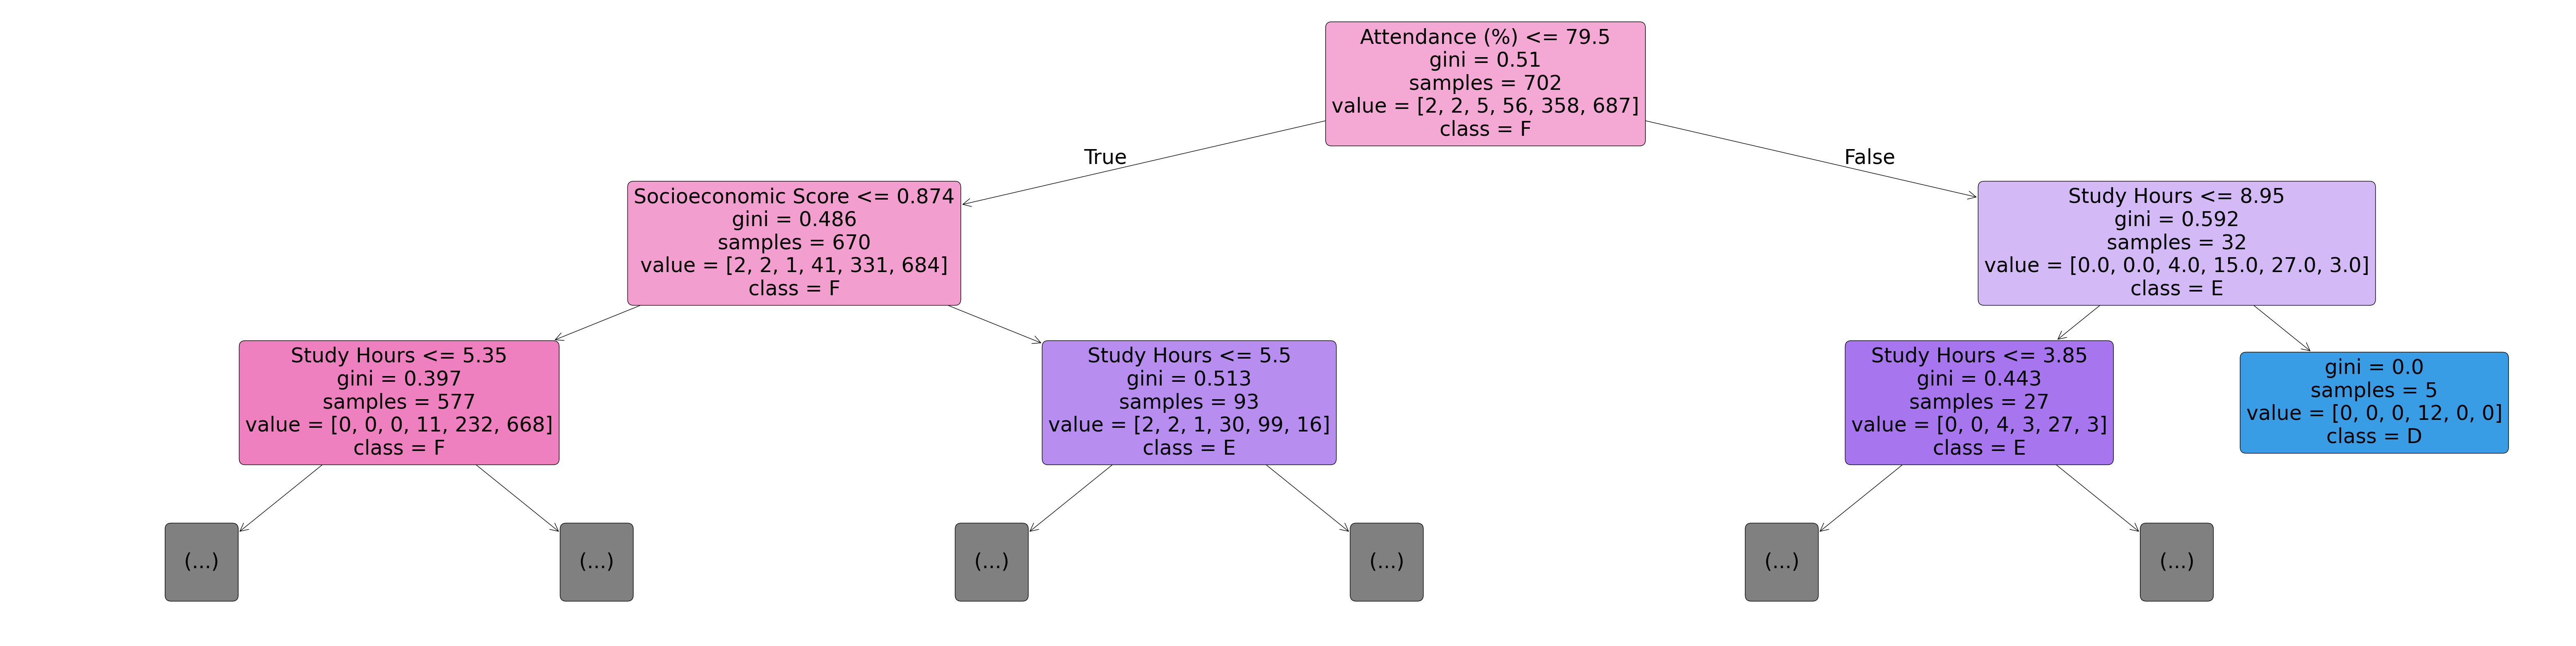

In [73]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[0], feature_names=x_train.columns, max_depth=2, filled=True, rounded=True, class_names=[str(cls) for cls in model.classes_]);